# DAT405 Assignment 1 – Group 52
<p>Hampus Jansson - (6 hrs)<p>
<p>Erik Johannesen - (6 hrs)<p>
<p>Mars 28, 2022<p>

# Problem 1

<p>The data was filtered so that any entity that was not a country, was not included. The data is also only from 2018 because this was the latest year that was available. Since the purpose was not to look for trends over time, previous years was not looked at.<p>
    
<p>The data for life expectancy at birth and GDP per capita was taken from ourworldindata [1][2].<p>

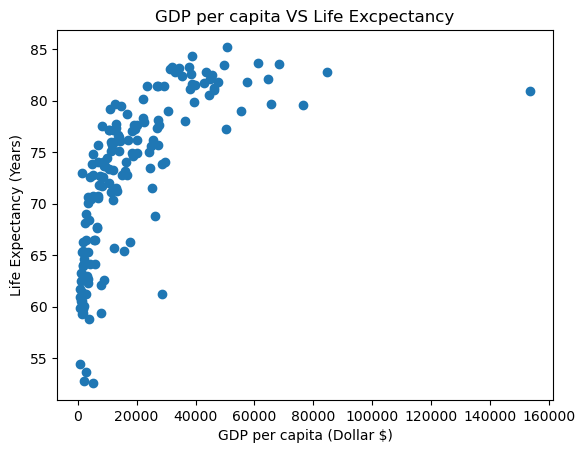

In [18]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

#reading dataframes
df1 = pandas.read_csv("C:\\Users\\kalla\\DataJupyter\\gdp-per-capita-maddison-2020.csv")
df2 = pandas.read_csv("C:\\Users\\kalla\\DataJupyter\\life-expectancy.csv")

#filter the dataframes by year
df1 = df1[(df1['Year'] == 2018)]
df2 = df2[(df2["Year"] == 2018)]


#removing all entitities that aren't countries
non_countries = ["World", "Western Offshoots", "Western Europe", "USSR", "Yugoslavia", "Sub-Sahara Africa", "South and South-East Asia", "Puerto Rico", "Czechoslovakia", "Eastern Europe", "Former Sudan", "Latin America", "Middle East"]

for c in non_countries:
    df1 = df1[(df1['Entity'] != c)]

#merging the dataframes into one
res = pandas.merge(df1, df2)

#displaying a scatterplot over GDP per capita vs life expectancy at birth
plt.scatter(res["GDP per capita"], res["Life expectancy at birth (historical)"])
plt.xlabel('GDP per capita (Dollar $)')
plt.ylabel('Life Expectancy (Years)')
plt.title("GDP per capita VS Life Excpectancy")
plt.show()

## Problem 2
<p> Here the data is filtered to only show the countries that have a life expectancy more than one standard deviation over the mean.<p>

In [19]:
temp = res["Life expectancy at birth (historical)"]

#filtering out countries that does not have have life expectancy one standard deviation above the mean
resB = res[(res["Life expectancy at birth (historical)"] >= np.mean(temp)+np.std(temp))]

#The columns that will be displayed in the result
columns = ["Entity", "Life expectancy at birth (historical)"]

#Creating the the final result that will be displayed and removing the columns that should not be displayed
resB = pandas.DataFrame(resB, columns=columns)

#showing result
print(display(resB))

,Entity,Life expectancy at birth (historical)
6,Australia,83.4
7,Austria,81.7
13,Belgium,81.5
24,Canada,82.1
37,Cyprus,81.4
40,Denmark,81.0
51,Finland,81.6
52,France,82.6
56,Germany,81.2
58,Greece,81.4


None


## Problem 3
<p>Here the data presents which countries that have "high" life expectancy but "low" GDP.<p>
    <p>The percentiles that was choosen for "high" and "low" was tested for different values. The 60th percentile for high and 40th percentile for low gave values that seemed reasonable because we do not consider any of the countries presented to have "high" GDP.<p>
        <p>The data for GDP was taken from ourworldindata[2].<p>


In [20]:
#Reading dataframe that have statistics for GDP for countries
df3 = pandas.read_csv("C:\\Users\\kalla\\DataJupyter\\gross-domestic-product.csv")

#Filtering out every year that is not 2018
df3 = df3[(df3["Year"] == 2018)]

#Merging res (gdp per capita and life expectency) with new dataframe
df4 = pandas.merge(res, df3)

#The columns that will be displayed in the result
columns = ["Entity", "Life expectancy at birth (historical)", "GDP (constant 2015 US$)"]

#Removing the columns that should not be displayed
resC = pandas.DataFrame(df4, columns=columns)

#Creating dataseries that for the data that needs to be compared
gdp_tot = resC["GDP (constant 2015 US$)"]
life_expect = resC["Life expectancy at birth (historical)"]

#Filtering out GDP that is not "low" and life expectancy that is not "high"
resC = resC[(resC["GDP (constant 2015 US$)"] <= np.percentile(gdp_tot, 40))]
resC = resC[(resC["Life expectancy at birth (historical)"] >= np.percentile(life_expect, 60))]

#Display the result
print(display(resC))

,Entity,Life expectancy at birth (historical),GDP (constant 2015 US$)
1,Albania,79.2,12702457856
9,Bahrain,79.9,34251782144
11,Barbados,77.1,4826653184
16,Bosnia and Herzegovina,77.1,17906900992
37,Cyprus,81.4,23632267264
48,Estonia,78.1,26013435904
66,Iceland,82.8,20351811584
93,Malta,83.3,13129078784
99,Montenegro,77.2,4591101952
110,North Macedonia,77.3,10764551168


None


## Problem 4
<p>No, this list shows the countries with high GDP and low life expectancy.<p>
    <p> This tells us that having a large economy (GDP) does not necessarily mean having a high life expectancy.<p>
        <p>GDP is affected by the size of the population heaviliy. This means that a country can have a high GDP even if the country has a low standard of living.<p>

In [21]:
#Filtering out GDP that is not "high" and life expectancy that is not "low"
resD = df4[(df4["GDP (constant 2015 US$)"] >= np.percentile(gdp_tot, 60))]
resD = resD[(resD["Life expectancy at birth (historical)"] <= np.percentile(life_expect, 40))]

#The columns that will be displayed in the result
columns = ["Entity", "Life expectancy at birth (historical)", "GDP (constant 2015 US$)"]

#Removing the columns that should not be displayed
resD = pandas.DataFrame(df4, columns=columns)

#Display the result
print(display(resD))

,Entity,Life expectancy at birth (historical),GDP (constant 2015 US$)
0,Afghanistan,63.1,20323487744
1,Albania,79.2,12702457856
2,Algeria,76.1,175426093056
3,Angola,62.1,110764474368
4,Argentina,77.0,583118094336
...,...,...,...
156,Uzbekistan,71.1,100427399168
157,Vietnam,74.0,234736467968
158,Yemen,64.6,36789669888
159,Zambia,62.3,23747586048


None


## Problem 5
<p>No, this list shows the countries with high GDP per capita and low life expectancy. <p>
    <p>Note that this list is shorter than the one above. This means GDP per capita likely has a stronger correlation to life expectancy than total GDP.<p>

In [22]:
gdp_perC = res["GDP per capita"]
life_expect = res["Life expectancy at birth (historical)"]

#choosing columns to be displayed
columns = ["Entity", "Life expectancy at birth (historical)", "GDP per capita"]

resE = pandas.DataFrame(res, columns=columns)

#Filtering out GDP per capita that is not "high" and life expectancy that is not "low"
resE = resE[(resE["GDP per capita"] >= np.percentile(gdp_perC, 60))]
resE = resE[(resE["Life expectancy at birth (historical)"] <= np.percentile(life_expect, 40))]

#Display the result
print(display(resE))

,Entity,Life expectancy at birth (historical),GDP per capita
47,Equatorial Guinea,61.2,28528.953
53,Gabon,66.3,17613.557
77,Kazakhstan,71.5,25307.555
151,Turkmenistan,68.8,26318.365


None


## References
<p>[1] Max Roser, Esteban Ortiz-Ospina and Hannah Ritchie (2013) - "Life Expectancy". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/life-expectancy' [Online Resource]<p>
    <p>[2]Max Roser (2013) - "Economic Growth". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/economic-growth' [Online Resource]<p>
    